In [1]:
import torchvision 
import torch
import torchattacks as tk

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='../Dataset/cifar10', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))]))
testset = torchvision.datasets.CIFAR10(root='../Dataset/cifar10', train=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))]))

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)
idx_class = trainset.classes

Files already downloaded and verified


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, path):
    npimg = img.cpu().numpy()
    fig = plt.figure()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.xticks([])  # 去掉x轴
    plt.yticks([])  # 去掉y轴
    plt.imshow(np.transpose(npimg,(1,2,0)))
    fig.savefig(path, format='svg')
    plt.show()


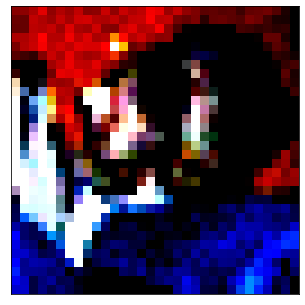

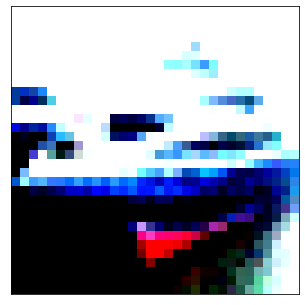

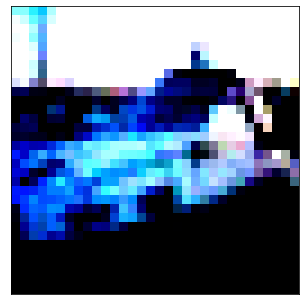

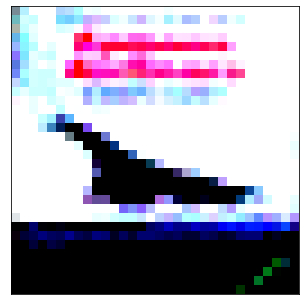

In [17]:
model = torch.load('resnet18clean.pt')
atk = tk.FGSM(model, eps=0.1)

inputs, targets = iter(testloader).next()

inputs = inputs
adv_images = atk(inputs, targets)
for i in range(4):
    imshow(torchvision.utils.make_grid(adv_images[i]), './example/attack'+str(i)+'.svg')


C:\Windows\Temp\ipykernel_81780\2156020357.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


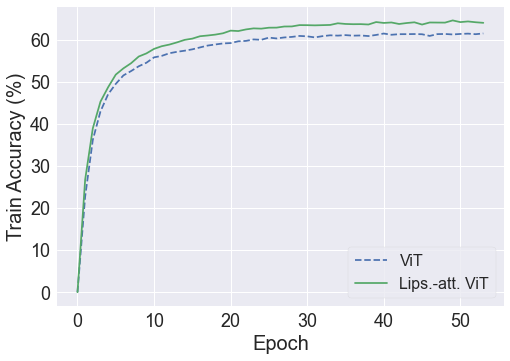

In [122]:
from cProfile import label
from tkinter import font
from turtle import color
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

vit = pd.read_csv('./csv/vit.csv')
lip = pd.read_csv('./csv/lip.csv')

vit_train_acc = vit['acc/train'].to_numpy()
vit_test_acc = vit['acc/test'].to_numpy()

lip_train_acc = lip['acc/train'].to_numpy()
lip_test_acc = lip['acc/test'].to_numpy()

vit_train_loss = vit['loss/train'].to_numpy()
lip_train_loss = lip['loss/train'].to_numpy()

vit_test_loss = vit['loss/test'].to_numpy()
lip_test_loss = lip['loss/test'].to_numpy()

x = vit['x']
import matplotlib
matplotlib.use('Agg')
plt.figure()
plt.style.use('seaborn')
plt.plot(x, vit_train_acc, '--',label='ViT')
plt.plot(x, lip_train_acc, label='Lips.-att. ViT')
plt.legend(loc='lower right', fontsize=16, frameon=True)
plt.ylabel('Train Accuracy (%)', fontsize=20)
# plt.xticks([])
plt.tick_params(labelsize=18)
plt.xlabel('Epoch', fontsize=20)
plt.grid(True)
plt.savefig('csv/trainacc.svg',format='svg')
plt.show()

C:\Windows\Temp\ipykernel_81780\622204617.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Windows\Temp\ipykernel_81780\622204617.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


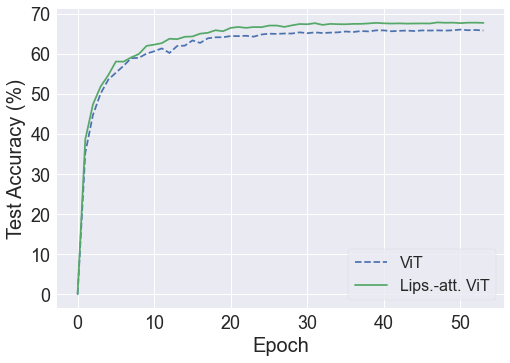

In [123]:
plt.figure()
plt.plot(x, vit_test_acc, '--', label='ViT')
plt.plot(x, lip_test_acc, label='Lips.-att. ViT')
plt.legend(loc='lower right', fontsize=16, frameon=True)
plt.ylabel('Test Accuracy (%)', fontsize=20)
# plt.xticks([])
plt.xlabel('Epoch', fontsize=20)
plt.tick_params(labelsize=18)
plt.grid(True)
plt.savefig('csv/testacc.svg',format='svg')
plt.show()
plt.show()

C:\Windows\Temp\ipykernel_81780\1014888938.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Windows\Temp\ipykernel_81780\1014888938.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


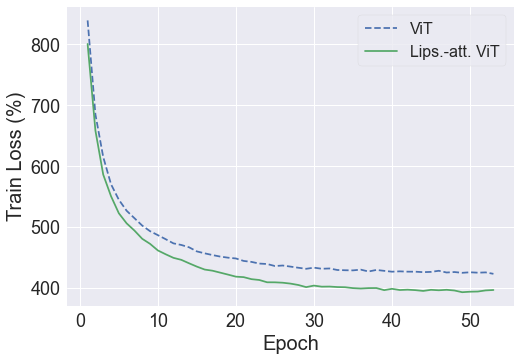

In [124]:
plt.figure()
plt.plot(x, vit_train_loss, '--', label='ViT')
plt.plot(x, lip_train_loss, label='Lips.-att. ViT')
plt.legend(loc='upper right', fontsize=16, frameon=True)
plt.ylabel('Train Loss (%)', fontsize=20)
# plt.xticks([])
plt.tick_params(labelsize=18)

plt.xlabel('Epoch', fontsize=20)
plt.grid(True)
plt.savefig('csv/trainloss.svg',format='svg')
plt.show()
plt.show()

C:\Windows\Temp\ipykernel_81780\2589654527.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Windows\Temp\ipykernel_81780\2589654527.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


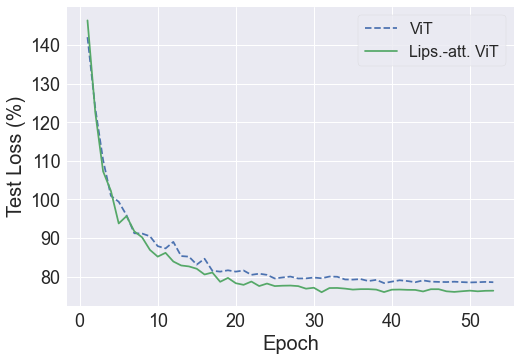

In [126]:
plt.figure()
plt.plot(x, vit_test_loss, '--', label='ViT')
plt.plot(x, lip_test_loss, label='Lips.-att. ViT')
plt.legend(loc='upper right', fontsize=16, frameon=True)
plt.ylabel('Test Loss (%)', fontsize=20)
# plt.xticks([])
plt.tick_params(labelsize=18)

plt.xlabel('Epoch', fontsize=20)
plt.grid(True)
plt.savefig('csv/testloss.svg',format='svg')
plt.show()
plt.show()